<a href="https://colab.research.google.com/github/sarrab/DMML2020_COOP/blob/master/Copy_of_COOP20_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

# Loading 

Below is how the dataset looks like

In [ ]:

df_train = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/project/training_data.csv")
df_train



,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
...,...,...,...,...,...
6466,4377,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1
6467,3408,derail,NaN,@EmiiliexIrwin Totally agree.She is 23 and kno...,0
6468,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
6469,10344,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1


There are 6471 rows and 5 columns in the training data.
Since column text contains the tweets, our first assumption is that it might be the most important predictor

### What does each column show?

This dataset contains tweets about whether or not a reported disaster is real. 
Some of the features in the dataset are:

>	1.	`Id` : id of the tweet.
>	2.	`keyword`: a kind of a title for that paritucular disaster 
>	3.	`location`: the geographical location where that disaster happened.
>	4.	`text`: the disaster messages in form a tweet.
>	5.	`target`: value representing whether the reported tweet was true or not
    
Our task is to predict whether a tweet is real or not, i.e, we should use the target column as the labels.




### A look at the Test data

In [ ]:
df_test=pd.read_csv("https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/project/test_data.csv")
df_test

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball
...,...,...,...,...
1137,3497,derailed,NaN,@ItsQueenBaby I'm at work it's a bunch of ppl ...
1138,9191,suicide%20bomber,NaN,#?? #?? #??? #??? Suicide bomber kills 15 in S...
1139,10217,volcano,NaN,Eruption of Indonesian volcano sparks transpor...
1140,5308,fear,New York,Never let fear get in the way of achieving you...


And we observe that there are 1142 rows and 4 columns in the training data. 
Having four columns instead 5 here indicates that these are predictors and the column "target" is the predicted 

# Initial EDA

In [ ]:
df_train.shape

(6471, 5)

In [ ]:
df_train_copy = df_train.copy()
df_train_copy_1 = df_train.copy()
df_train_copy_2 = df_train.copy()
df_train_copy_3 = df_train.copy()
df_train_copy_4 = df_train.copy()
df_train_copy_5 = df_train.copy()
df_train_copy_6 = df_train.copy()
df_train_copy_7 = df_train.copy()
df_train_copy_8 = df_train.copy()
df_train_copy_9 = df_train.copy()

Let's use these dataset for trying various things out 

In [ ]:
df_train_copy_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 5 columns):
id          6471 non-null int64
keyword     6416 non-null object
location    4330 non-null object
text        6471 non-null object
target      6471 non-null int64
dtypes: int64(2), object(3)
memory usage: 252.9+ KB


In [ ]:
df_test_copy = df_test.copy()
df_test_copy_1 = df_test.copy()
df_test_copy_2 = df_test.copy()

#### A quick look at the different types of tweets

Below is a tweet on real disaster 

In [ ]:
# a quick look on data
quick_look_real = df_train[df_train["target"] == 1 ]['text'].values[2]
quick_look_real


'New ISIS Video: ISIS Threatens to Behead Croatian Hostage Within 48 Hours - TLVFaces - TLVFaces#auspol http://t.co/a6PPEgeLOX'

This is a typical tweet on fake disaster 

In [ ]:
# a quick look on data
quick_look_fake = df_train[df_train["target"] == 0 ]['text'].values[2]
quick_look_fake


'Billionaires have a plan to free half a billion dollars trapped in Venezuela for two years @BlakeSchmidt reports.\n\nhttp://t.co/gbqTc7Sp9C'

#### Let's see how the real and fake disaster tweets are distributed

In [ ]:
df_train['target'].value_counts()


0    3701
1    2770
Name: target, dtype: int64

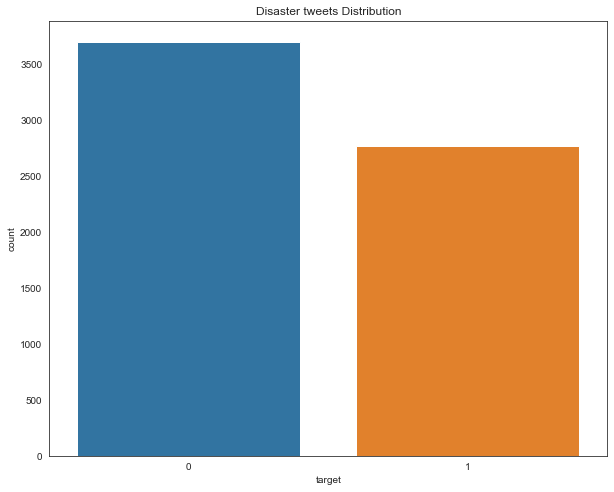

In [ ]:
import seaborn as sns

plt.subplots(1,1,figsize=(10,8))
sns.countplot('target',data=df_train) #this gives the frequency of each
plt.title("Disaster tweets Distribution")
plt.show()

It is clear that there are more fake than real ones. 

### The Base rate is given as follows:

In [ ]:
round(df_train.target.value_counts()[0]/len(df_train), 4 )

0.5719

Our predictions have to outperform the base rate. And such a base rate being around 50, the dataframe will not need to be balanced

## Let's do further exploration

In [ ]:
df_train.head(3)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1


#### Words Distribution

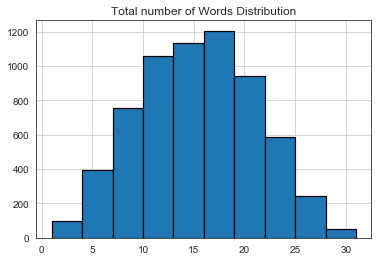

In [ ]:
# let's split the words

df_train['totalwords'] = df_train['text'].str.split().str.len()


df_train['totalwords'].hist(edgecolor='black', linewidth=1.2)
plt.title('Total number of Words Distribution')
plt.show()

This is how the total words are distributed

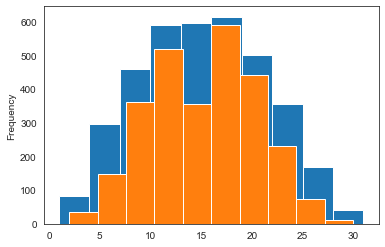

In [ ]:
df_train['totalwords'][df_train['target'] == 0].plot.hist()
df_train['totalwords'][df_train['target'] == 1].plot.hist()

Here, we see that the most longest real disaster tweets have between 15 and 20 words.

#### Character Distribution Comparison

Here, we compare the distribution of real and fake disaster tweets 

In [ ]:
df_train['totalcharacter'] = df_train['text'].apply(lambda x: len(x))
df_train['totalcharacter'][df_train['target'] == 0]

0       106
1       106
6       137
7       144
8       115
       ... 
6458    135
6461     17
6462     74
6464    134
6467    140
Name: totalcharacter, Length: 3701, dtype: int64

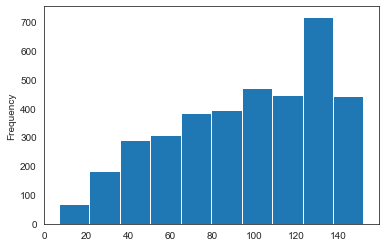

In [ ]:
df_train['totalcharacter'][df_train['target'] == 0].plot.hist()

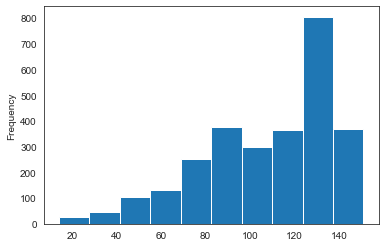

In [ ]:
df_train['totalcharacter'][df_train['target'] == 1].plot.hist()

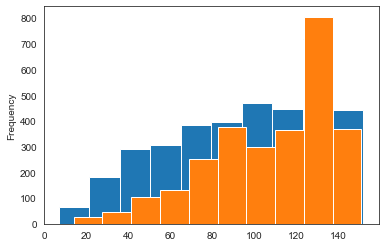

In [ ]:
df_train['totalcharacter'][df_train['target'] == 0].plot.hist()
df_train['totalcharacter'][df_train['target'] == 1].plot.hist()

> We observe that real disaster tweet characters are fewer than the fakes ones.
> Real disaster tweets have at least 20 characters. And most of them have at least 80 characters
> But this is not very significant 

#### unique word

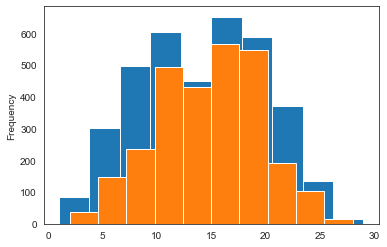

In [ ]:
df_train['uniqueword'] = df_train['text'].apply(lambda x: len(set(x.split())))
df_train['uniqueword'][df_train['target'] == 0].plot.hist()
df_train['uniqueword'][df_train['target'] == 1].plot.hist()

#### Average Word Length

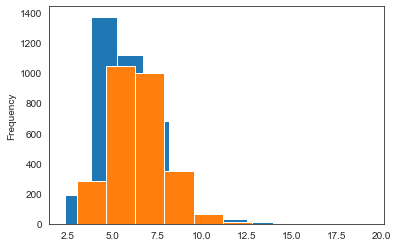

In [ ]:
def avg_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

df_train['avg_word_length'] = df_train['text'].apply(avg_word_length)
df_train['avg_word_length'][df_train['target'] == 0].plot.hist()
df_train['avg_word_length'][df_train['target'] == 1].plot.hist()


We may use this feature in our analysis 

#### The location with the most fake disaster tweet 

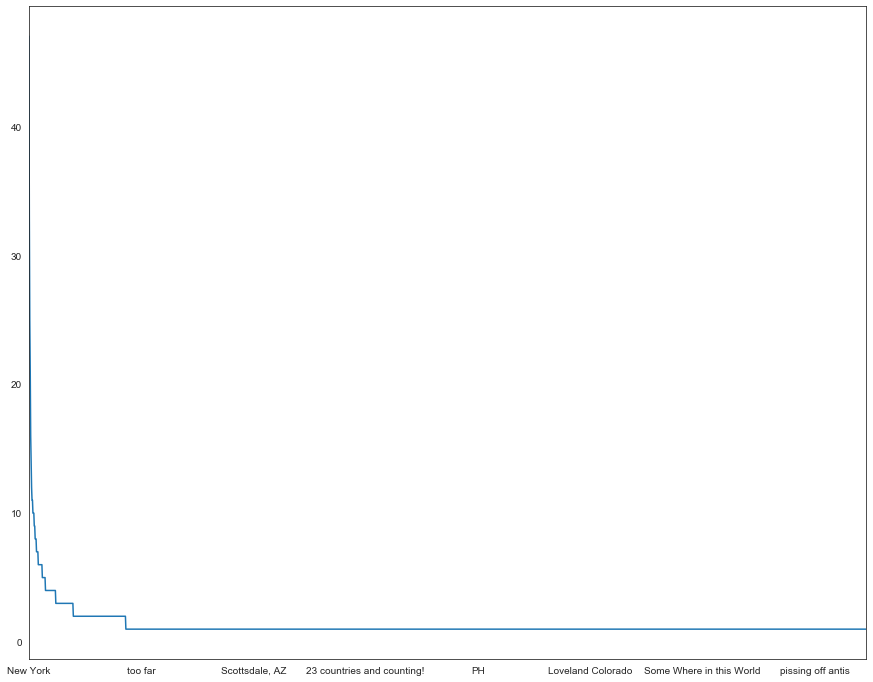

In [ ]:
df_train['location'][df_train['target'] == 0].value_counts().plot(figsize=(15, 12))


>According this most of the fake disaster tweets apparently come from New york.
>And many have a pseudoname as location

#### The location with the most real disaster tweet 

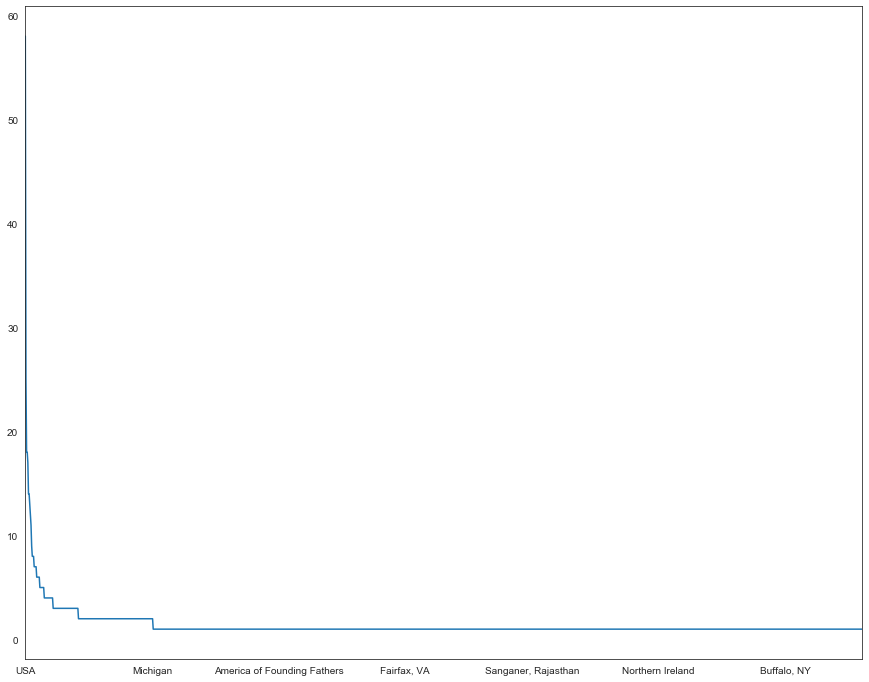

In [ ]:
df_train['location'][df_train['target'] == 1].value_counts().plot(figsize=(15, 12))


This gives an idea about the locations where most of the real tweets come from  

In [ ]:
df_train_copy['location'].value_counts()

USA                            91
New York                       59
United States                  46
London                         39
Canada                         25
                               ..
portland, oregon                1
dorito land                     1
Silang, Cavite / ParaÌ±aque     1
Oshawa/Toronto                  1
Bathtub de Bett                 1
Name: location, Length: 2921, dtype: int64

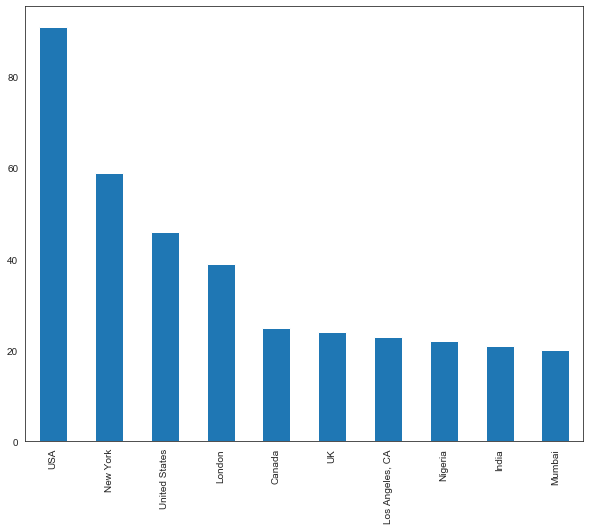

In [ ]:
top_location = df_train_copy['location'].value_counts()
top_location.head(10).plot(kind="bar", figsize=(10, 8))

###### None of the above can become new features.
###### Therefore, they are not useful enough to be  added as input in our model.




### Correlation 

In [ ]:
# encode keyword and do a displot with target or corr analysis # also with id

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

ohe = OneHotEncoder() #creating the object encoder 


In [ ]:
# categorical_cols = ['keyword']
df_train["keyword"] = df_train.keyword.astype('category').cat.codes

df_train["location"] = df_train.location.astype('category').cat.codes

In [ ]:
df_train

,id,keyword,location,text,target,totalwords,totalcharacter,uniqueword,avg_word_length
0,3738,75,2313,Black Eye 9: A space battle occurred at Star O...,0,19,106,19,4.631579
1,853,17,-1,#world FedEx no longer to transport bioterror ...,0,15,106,15,6.066667
2,10540,216,1746,Reality Training: Train falls off elevated tra...,1,12,105,12,7.833333
3,5988,122,2313,#Taiwan Grace: expect that large rocks trees m...,1,19,133,19,6.052632
4,6328,128,324,New ISIS Video: ISIS Threatens to Behead Croat...,1,17,125,15,6.411765
...,...,...,...,...,...,...,...,...,...
6466,4377,88,183,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1,17,135,17,7.000000
6467,3408,69,-1,@EmiiliexIrwin Totally agree.She is 23 and kno...,0,25,140,24,4.640000
6468,9794,200,-1,Hollywood Movie About Trapped Miners Released ...,1,17,136,16,7.058824
6469,10344,212,375,Friendly reminder that the only country to eve...,1,20,133,19,5.700000


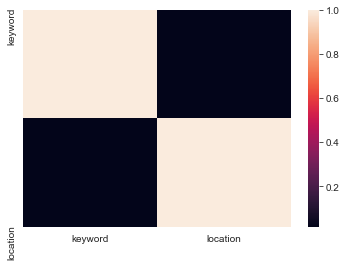

In [ ]:
sns.heatmap(df_train[['keyword','location']].corr())

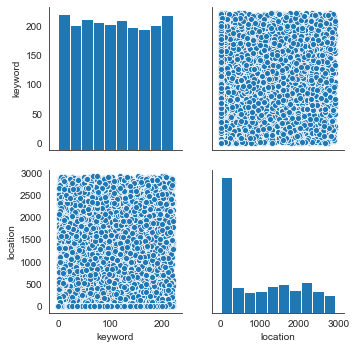

In [ ]:
sns.pairplot(df_train[['keyword','location']]) #this function compares variables two by two

These graphs are Not particularly insightful. 

# I. Initial Classification Model: 

Our initial assumption is that the by default predictors (keyword, location and especially text) have a correlation or perhaps a causality with the fact that a tweet is either real or not

In [ ]:
df_train_copy.tail(5)

,id,keyword,location,text,target
6466,4377,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1
6467,3408,derail,NaN,@EmiiliexIrwin Totally agree.She is 23 and kno...,0
6468,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
6469,10344,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1
6470,1779,buildings%20on%20fire,NaN,Buildings are on fire and they have time for a...,1


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import spacy

from spacy import displacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


## I.1. Model After direct Vectorization (without General Cleaning Nor Text Cleaning)

### I.1.1. With One Predictor 'text'

In [ ]:
# Select features
X_train = df_train_copy['text'].values # the features we want to analyze
y_train = df_train_copy['target'].values # the labels, or answers, we want to test against


X_test = df_test['text'].values # the features we want to analyze

As per our intuition, we want to do this because TF-IDF takes of care unimportant words like most the stop words

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf = True, max_df = 0.95)
tfidf_vectorizer.fit_transform(X_train)
        
train_feature_set = tfidf_vectorizer.transform(X_train)    

In [ ]:
classifier = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)


# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vectorizer),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.95, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inte

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
print(f"ACCURACY SCORE:\n{pipe.score(X_train, y_train):.6f}")

ACCURACY SCORE:
0.888425


This gives model is trained with not sanitized. But it gives a better accuracy than the base rate. 

In [ ]:
#Submission

target_pred = pd.DataFrame(y_pred, columns= ['target'])

target_pred.to_csv (r'/Users/MBP/Documents/UNIL/DM&ML/Project/submission1_30Nov.csv', index = False, header=True)



### I.1.2 With Two predictors 'text' and 'keyword'

In [ ]:
df_train_copy['Text With Keyword'] = df_train_copy['keyword'].str.cat(df_train_copy['text'], sep =" ") 
df_train_copy.drop(['text','keyword'],inplace=True, axis=1)

In [ ]:
df_train_copy

,id,location,target,Text With Keyword
0,3738,USA,0,destroyed Black Eye 9: A space battle occurred...
1,853,NaN,0,bioterror #world FedEx no longer to transport ...
2,10540,"Palm Beach County, FL",1,windstorm Reality Training: Train falls off el...
3,5988,USA,1,hazardous #Taiwan Grace: expect that large roc...
4,6328,Australia,1,hostage New ISIS Video: ISIS Threatens to Behe...
...,...,...,...,...
6466,4377,ARGENTINA,1,earthquake #Earthquake #Sismo M 1.9 - 15km E o...
6467,3408,NaN,0,derail @EmiiliexIrwin Totally agree.She is 23 ...
6468,9794,NaN,1,trapped Hollywood Movie About Trapped Miners R...
6469,10344,Beirut/Toronto,1,weapons Friendly reminder that the only countr...


In [ ]:
X_train_prdc_2 = df_train_copy['Text With Keyword'].values # the features we want to analyze

X_train_prdc_2

array(['destroyed Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       'bioterror #world FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps  http://t.co/5zDbTktwW7',
       'windstorm Reality Training: Train falls off elevated tracks during windstorm http://t.co/JIOMnrCygT #Paramedic #EMS',
       ...,
       "trapped Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/tyyfG4qQvM",
       'weapons Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK',
       'buildings%20on%20fire Buildings are on fire and they have time for a business meeting #TheStrain'],
      dtype=object)

In [ ]:
tfidf_vectorizer_prd_2 = TfidfVectorizer(use_idf = True, max_df = 0.95)
tfidf_vectorizer_prd_2.fit_transform(X_train_prdc_2.astype('U'))

# x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work

tfidf_vectorizer_prd_2.transform(X_train_prdc_2.astype('U'))    

<6471x19316 sparse matrix of type '<class 'numpy.float64'>'
	with 95729 stored elements in Compressed Sparse Row format>

In [ ]:
classifier_pred2 = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)


# Create pipeline
pipe_prd_2 = Pipeline([('vectorizer', tfidf_vectorizer_prd_2),
                 ('classifier', classifier_pred2)])

# Fit model on training set
pipe_prd_2.fit(X_train_prdc_2.astype('U'), y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.95, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inte

In [ ]:
y_pred_2p = pipe_prd_2.predict(X_test)
y_pred_2p

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
print(f"ACCURACY SCORE:\n{pipe_prd_2.score(X_train_prdc_2.astype('U'), y_train):.6f}")

ACCURACY SCORE:
0.882862


In [ ]:
#Submission

target_pred = pd.DataFrame(y_pred_2p, columns= ['target'])

target_pred.to_csv (r'/Users/MBP/Documents/UNIL/DM&ML/Project/submission1_4Dec.csv', index = False, header=True)


#done

### I.1.3 With Two predictors 'text' and 'location'

In [ ]:
df_train_copy_6['Text With location'] = df_train_copy_6['location'].str.cat(df_train_copy_6['text'], sep =" ") 
df_train_copy_6.drop(['text','location'],inplace=True, axis=1)

In [ ]:
X_train_cl_p2_loc = df_train_copy_6['Text With location'].values

X_train_cl_p2_loc

array(['USA Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       nan,
       'Palm Beach County, FL Reality Training: Train falls off elevated tracks during windstorm http://t.co/JIOMnrCygT #Paramedic #EMS',
       ..., nan,
       'Beirut/Toronto Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK',
       nan], dtype=object)

In [ ]:
tfidf_vectorizer_prd_2_loc = TfidfVectorizer(use_idf = True, max_df = 0.95)
tfidf_vectorizer_prd_2_loc.fit_transform(X_train_cl_p2_loc.astype('U'))

# x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work

tfidf_vectorizer_prd_2_loc.transform(X_train_cl_p2_loc.astype('U'))    

<6471x16515 sparse matrix of type '<class 'numpy.float64'>'
	with 75320 stored elements in Compressed Sparse Row format>

In [ ]:
classifier_pred2_loc = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)


# Create pipeline
pipe_prd_2_loc = Pipeline([('vectorizer', tfidf_vectorizer_prd_2_loc),
                 ('classifier', classifier_pred2_loc)])

# Fit model on training set
pipe_prd_2_loc.fit(X_train_cl_p2_loc.astype('U'), Y_train_cl_p2_loc)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.95, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inte

In [ ]:
y_pred_2p_loc = pipe_prd_2_loc.predict(X_test)
y_pred_2p_loc

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
print(f"ACCURACY SCORE:\n{pipe_prd_2_loc.score(X_train_cl_p2_loc.astype('U'), y_train):.6f}")

ACCURACY SCORE:
0.789059


In [ ]:
#No submission

### I.1.4 With Three predictors 'text', 'location' and 'keyword'


In [ ]:
df_train_copy['Text With Keyword and Location'] = df_train_copy['location'].str.cat(df_train_copy['Text With Keyword'], sep =" ") 
df_train_copy.drop(['location','Text With Keyword'],inplace=True, axis=1)

In [ ]:
df_train_copy

,id,target,Text With Keyword and Location
0,3738,0,USA destroyed Black Eye 9: A space battle occu...
1,853,0,NaN
2,10540,1,"Palm Beach County, FL windstorm Reality Traini..."
3,5988,1,USA hazardous #Taiwan Grace: expect that large...
4,6328,1,Australia hostage New ISIS Video: ISIS Threat...
...,...,...,...
6466,4377,1,ARGENTINA earthquake #Earthquake #Sismo M 1.9 ...
6467,3408,0,NaN
6468,9794,1,NaN
6469,10344,1,Beirut/Toronto weapons Friendly reminder that ...


In [ ]:
X_train_prdc_3 = df_train_copy['Text With Keyword and Location'].values # the features we want to analyze

X_train_prdc_3#.values

array(['USA destroyed Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       nan,
       'Palm Beach County, FL windstorm Reality Training: Train falls off elevated tracks during windstorm http://t.co/JIOMnrCygT #Paramedic #EMS',
       ..., nan,
       'Beirut/Toronto weapons Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK',
       nan], dtype=object)

In [ ]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 3 columns):
id                                6471 non-null int64
target                            6471 non-null int64
Text With Keyword and Location    4330 non-null object
dtypes: int64(2), object(1)
memory usage: 151.8+ KB


In [ ]:
tfidf_vectorizer_prd_3 = TfidfVectorizer(use_idf = True, max_df = 0.95)
tfidf_vectorizer_prd_3.fit_transform(X_train_prdc_3.astype('U'))

# x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work

tfidf_vectorizer_prd_3.transform(X_train_prdc_3.astype('U'))    

<6471x16545 sparse matrix of type '<class 'numpy.float64'>'
	with 76370 stored elements in Compressed Sparse Row format>

In [ ]:
classifier_pred3 = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)


# Create pipeline
pipe_prd_3 = Pipeline([('vectorizer', tfidf_vectorizer_prd_3),
                 ('classifier', classifier_pred3)])

# Fit model on training set
pipe_prd_3.fit(X_train_prdc_3.astype('U'), y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.95, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inte

In [ ]:
y_pred_3p = pipe_prd_3.predict(X_test)
y_pred_3p

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
print(f"ACCURACY SCORE:\n{pipe_prd_3.score(X_train_prdc_2.astype('U'), y_train):.6f}")

ACCURACY SCORE:
0.882862


In [ ]:
#Submission

target_pred = pd.DataFrame(y_pred_3p, columns= ['target'])

target_pred.to_csv (r'/Users/MBP/Documents/UNIL/DM&ML/Project/submission2_4Dec.csv', index = False, header=True)


## Model after Text Cleaning but without General Data Cleaning

### With a single Predictor

#### TF-IDF feature vectors

create the TF-IDF feature vectors for the processed tweets. These will construct you data features that you will use to train a classifier.

In [ ]:
tfidf_vector_1 = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer 

In [ ]:
# Define classifier
classifier_1 = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)

# Create pipeline
pipe_2 = Pipeline([('vectorizer', tfidf_vector_1),
                 ('classifier', classifier_1)])

# Fit model on training set
pipe_2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a22cd3c20>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred = pipe_2.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

#### Accuracy

- What is the test accuracy of the classifier?

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_2.score(X_train, y_train):.6f}")

ACCURACY SCORE:
0.888734


We observe that the accuracy has improved after pre-processing.
#### We'll clean the data and redo the Model training 

### With two Predictors: Keyword and Text

In [ ]:
# Define classifier
classifier_1 = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)

# Create pipeline
pipe_2 = Pipeline([('vectorizer', tfidf_vector_1),
                 ('classifier', classifier_1)])

# Fit model on training set
pipe_2.fit(X_train_prdc_2.astype('U'), y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_p_p2 = pipe_2.predict(X_test)
y_pred_p_p2

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_2.score(X_train_prdc_2.astype('U'), y_train):.6f}")

ACCURACY SCORE:
0.878226


### With two Predictors: Location and Text

In [ ]:
# Define classifier
classifier_1 = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)

# Create pipeline
pipe_2 = Pipeline([('vectorizer', tfidf_vector_1),
                 ('classifier', classifier_1)])

# Fit model on training set
pipe_2.fit(X_train_cl_p2_loc.astype('U'), y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2e3b44d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_p_p2 = pipe_2.predict(X_test)
y_pred_p_p2

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_2.score(X_train_cl_p2_loc.astype('U'), y_train):.6f}")

ACCURACY SCORE:
0.789986


### With three Predictors

In [ ]:
# Define classifier
classifier_1 = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)

# Create pipeline
pipe_2 = Pipeline([('vectorizer', tfidf_vector_1),
                 ('classifier', classifier_1)])

# Fit model on training set
pipe_2.fit(X_train_prdc_3.astype('U'), y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_p_p3 = pipe_2.predict(X_test)
y_pred_p_p3

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_2.score(X_train_prdc_3.astype('U'), y_train):.6f}")

ACCURACY SCORE:
0.784268


## Model After Cleaning 1

### 2.1. Non Balanced

In [ ]:
df_train_clean_copy

,id,target,Text With Keyword
0,3738,0,destroyed Black Eye 9: A space battle occurred...
1,853,0,bioterror #world FedEx no longer to transport ...
2,10540,1,windstorm Reality Training: Train falls off el...
3,5988,1,hazardous #Taiwan Grace: expect that large roc...
4,6328,1,hostage New ISIS Video: ISIS Threatens to Behe...
...,...,...,...
6466,4377,1,earthquake #Earthquake #Sismo M 1.9 - 15km E o...
6467,3408,0,derail @EmiiliexIrwin Totally agree.She is 23 ...
6468,9794,1,trapped Hollywood Movie About Trapped Miners R...
6469,10344,1,weapons Friendly reminder that the only countr...


### Single Predictor

In [ ]:
# Select features
X_train_cl_1 = df_train_clean_copy['text'].values # the features we want to analyze
Y_train_cl_1 = df_train_clean_copy['target'].values
X_train_cl_1

array(['Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       '#world FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps  http://t.co/5zDbTktwW7',
       'Reality Training: Train falls off elevated tracks during windstorm http://t.co/JIOMnrCygT #Paramedic #EMS',
       ...,
       "Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/tyyfG4qQvM",
       'Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK',
       'Buildings are on fire and they have time for a business meeting #TheStrain'],
      dtype=object)

In [ ]:
Y_train_cl_1

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
tfidf_vector_2 = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer 

In [ ]:
# Define classifier
classifier_2 = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)

# Create pipeline
pipe_3 = Pipeline([('vectorizer', tfidf_vector_2),
                 ('classifier', classifier_2)])

# Fit model on training set
pipe_3.fit(X_train_cl_1, Y_train_cl_1)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_3 = pipe_3.predict(X_test)
y_pred_3

array([0, 0, 1, ..., 1, 0, 1])

#### Accuracy

- What is the test accuracy of the classifier?

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_cl_1, Y_train_cl_1):.6f}")


ACCURACY SCORE:
0.889151


#### there is a sligth improvement after cleaning 

### Two Predictors: Text and Keyword

In [ ]:
X_train_cl_p2 = df_train_copy_1['Text With Keyword'].values
Y_train_cl_p2 = df_train_copy_1['target'].values
X_train_cl_p2

array(['destroyed Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       'bioterror #world FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps  http://t.co/5zDbTktwW7',
       'windstorm Reality Training: Train falls off elevated tracks during windstorm http://t.co/JIOMnrCygT #Paramedic #EMS',
       ...,
       "trapped Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/tyyfG4qQvM",
       'weapons Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK',
       'buildings%20on%20fire Buildings are on fire and they have time for a business meeting #TheStrain'],
      dtype=object)

In [ ]:
Y_train_cl_p2

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
# Define classifier

pipe_3.fit(X_train_cl_p2, Y_train_cl_p2)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_3 = pipe_3.predict(X_test)
y_pred_3

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_2.score(X_train_cl_p2, Y_train_cl_p2):.6f}")

ACCURACY SCORE:
0.847700


### Two Predictors: Text and location

In [ ]:
df_train_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4312 entries, 0 to 6469
Data columns (total 6 columns):
id                    4312 non-null int64
keyword               4312 non-null object
location              4312 non-null object
text                  4312 non-null object
target                4312 non-null int64
Text With location    4312 non-null object
dtypes: int64(2), object(4)
memory usage: 235.8+ KB


In [ ]:
X_train_cl_p2_loc = df_train_copy_3['Text With location'].values
Y_train_cl_p2_loc = df_train_copy_3['target'].values
X_train_cl_p2_loc

array(['USA Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       'Palm Beach County, FL Reality Training: Train falls off elevated tracks during windstorm http://t.co/JIOMnrCygT #Paramedic #EMS',
       'USA #Taiwan Grace: expect that large rocks trees mud unstable and/or saturated land may slide ..very hazardous in hilly/mountain areas...',
       ...,
       "Calgary, AB, Canada China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/BqBLWiw08g #ROIMentor #yycwalks",
       'ARGENTINA #Earthquake #Sismo M 1.9 - 15km E of Anchorage Alaska: Time2015-08-06 00:11:16 UTC2015-08-05 16:11:16 -08:00 ... http://t.co/Z0VeR1hVM9',
       'Beirut/Toronto Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK'],
      dtype=object)

In [ ]:

pipe_3.fit(X_train_cl_p2_loc, Y_train_cl_p2_loc)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_3 = pipe_3.predict(X_test)
y_pred_3

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_cl_p2_loc, Y_train_cl_p2_loc):.6f}") #hv a look

ACCURACY SCORE:
0.897959


### Three Predictors

In [ ]:
X_train_cl_p3_loc = df_train_copy_2['Text With Keyword and Location'].values
Y_train_cl_p3_loc = df_train_copy_2['target'].values
X_train_cl_p3_loc

array(['USA destroyed Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       'Palm Beach County, FL windstorm Reality Training: Train falls off elevated tracks during windstorm http://t.co/JIOMnrCygT #Paramedic #EMS',
       'USA hazardous #Taiwan Grace: expect that large rocks trees mud unstable and/or saturated land may slide ..very hazardous in hilly/mountain areas...',
       ...,
       "Calgary, AB, Canada rubble China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/BqBLWiw08g #ROIMentor #yycwalks",
       'ARGENTINA earthquake #Earthquake #Sismo M 1.9 - 15km E of Anchorage Alaska: Time2015-08-06 00:11:16 UTC2015-08-05 16:11:16 -08:00 ... http://t.co/Z0VeR1hVM9',
       'Beirut/Toronto weapons Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK'],
      dtype=object)

In [ ]:
Y_train_cl_p3_loc

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
# Define classifier

pipe_3.fit(X_train_cl_p3_loc, Y_train_cl_p3_loc)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_cl_3 = pipe_3.predict(X_test)
y_pred_cl_3

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_cl_p3_loc, Y_train_cl_p3_loc):.6f}")

ACCURACY SCORE:
0.888683


### 2.2. Balanced df

#### Balancing about text

In [ ]:
df_train_clean_copy

,id,target,Text With Keyword
0,3738,0,destroyed Black Eye 9: A space battle occurred...
1,853,0,bioterror #world FedEx no longer to transport ...
2,10540,1,windstorm Reality Training: Train falls off el...
3,5988,1,hazardous #Taiwan Grace: expect that large roc...
4,6328,1,hostage New ISIS Video: ISIS Threatens to Behe...
...,...,...,...
6466,4377,1,earthquake #Earthquake #Sismo M 1.9 - 15km E o...
6467,3408,0,derail @EmiiliexIrwin Totally agree.She is 23 ...
6468,9794,1,trapped Hollywood Movie About Trapped Miners R...
6469,10344,1,weapons Friendly reminder that the only countr...


In [ ]:
# Create balanced dataframe - base rate = 0.5 around text #single predictor
df_new_blc = pd.concat([df_train_clean_copy[df_train_clean_copy["target"] == 0].sample(len(df_train_clean_copy[df_train_clean_copy["target"] == 1])), df_train_clean_copy[df_train_clean_copy["target"] == 1]], axis=0).reset_index()
df_new_blc

,index,id,target,Text With Keyword
0,3690,976,0,blaze ?? Yes I do have 2 guns ?? ??
1,3718,7809,0,quarantine Check Out: 'Reddit Will Now Quarant...
2,907,1418,0,body%20bag genuine Leather man Bag Messenger f...
3,3145,4642,0,emergency%20services @swayoung01 Hi I thought ...
4,3070,10665,0,wounds If time heals all wounds how come the b...
...,...,...,...,...
5403,6465,8330,1,rubble China's Stock Market Crash: Are There G...
5404,6466,4377,1,earthquake #Earthquake #Sismo M 1.9 - 15km E o...
5405,6468,9794,1,trapped Hollywood Movie About Trapped Miners R...
5406,6469,10344,1,weapons Friendly reminder that the only countr...


In [ ]:
len(df_new_blc[df_new_blc['target']==0])

2704

### Single Predictor balanced

In [ ]:
X_train_blcd_p1 = df_new_blc['text'].values
Y_train_blcd_p1 = df_new_blc['target'].values
X_train_blcd_p1

array(["All I got in this world is my bros I don't wanna see no harm come they way Ima lil upset right now ??",
       'I guess ill never be able to go to mayhem...',
       'I slammed my phone to the ground and then screamed ahahahga', ...,
       "Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/tyyfG4qQvM",
       'Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK',
       'Buildings are on fire and they have time for a business meeting #TheStrain'],
      dtype=object)

In [ ]:
Y_train_blcd_p1

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# # Define classifier
# classifier_2 = LogisticRegression(solver='saga', max_iter=1000, random_state = 72)

# # Create pipeline
# pipe_3 = Pipeline([('vectorizer', tfidf_vector_2),
#                  ('classifier', classifier_2)])

# Fit model on training set
pipe_3.fit(X_train_blcd_p1, Y_train_blcd_p1)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_blcd = pipe_3.predict(X_test)
y_pred_blcd

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_blcd_p1, Y_train_blcd_p1):.6f}")

ACCURACY SCORE:
0.908099


### Two Predictors : Text and keyword

**we need a clean df with these two params**

In [ ]:
# Create balanced dataframe - base rate = 0.5 around text #single predictor
df_new_blc_2pdt = pd.concat([df_train_copy_1[df_train_copy_1["target"] == 0].sample(len(df_train_copy_1[df_train_copy_1["target"] == 1])), df_train_copy_1[df_train_copy_1["target"] == 1]], axis=0).reset_index()
df_new_blc_2pdt

,index,id,target,Text With Keyword
0,2736,6141,0,hijack 0-day bug in fully patched OS X comes u...
1,4035,5391,0,fire%20truck Trident 90225 Chevy fire Truck w/...
2,463,2112,0,catastrophe #Borrowers concerned at possible #...
3,2513,6217,0,hijacker Governor weighs parole for California...
4,3736,6602,0,inundated @bentossell @ProductHunt Thanks! I k...
...,...,...,...,...
5403,6465,8330,1,rubble China's Stock Market Crash: Are There G...
5404,6466,4377,1,earthquake #Earthquake #Sismo M 1.9 - 15km E o...
5405,6468,9794,1,trapped Hollywood Movie About Trapped Miners R...
5406,6469,10344,1,weapons Friendly reminder that the only countr...


In [ ]:
X_train_blcd_p2 = df_new_blc_2pdt['Text With Keyword'].values
Y_train_blcd_p2 = df_new_blc_2pdt['target'].values
X_train_blcd_p2

array(['fire%20truck #RFP: Fire Truck Service Body for F-450 (Fire fighting rescue &amp; safety equipment Transporta... http://t.co/8GtRvEcE1N',
       "emergency%20services Want to work at Swedish Health Services? We're #hiring in #Seattle WA! Click for details: http://t.co/4KDThCtEmV #Nursing #Job #Jobs",
       "hellfire @IAN_Hellfire I got it for the mistake but boss got it worse cause their job was to oversee my work. Boss didn't change after that...",
       ...,
       "trapped Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/tyyfG4qQvM",
       'weapons Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK',
       'buildings%20on%20fire Buildings are on fire and they have time for a business meeting #TheStrain'],
      dtype=object)

In [ ]:

# Fit model on training set
pipe_3.fit(X_train_blcd_p2, Y_train_blcd_p2)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_blc_p2 = pipe_3.predict(X_test)
y_pred_blc_p2

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_blcd_p2, Y_train_blcd_p2):.6f}")

ACCURACY SCORE:
0.882212


### Two Predictors : Text and location

In [ ]:
# Create balanced dataframe - base rate = 0.5 around text #single predictor
df_new_blc_2pd_loc = pd.concat([df_train_copy_3[df_train_copy_3["target"] == 0].sample(len(df_train_copy_3[df_train_copy_3["target"] == 1])), df_train_copy_3[df_train_copy_3["target"] == 1]], axis=0).reset_index()
df_new_blc_2pd_loc

,index,id,keyword,location,text,target,Text With location
0,2195,10150,upheaval,"CPT & JHB, South Africa",To navigate inevitable upheaval internal audit...,0,"CPT & JHB, South Africa To navigate inevitable..."
1,2205,9864,traumatised,Sweden,@Ruddyyyyyy @JamieGriff97 Jamie is too traumat...,0,Sweden @Ruddyyyyyy @JamieGriff97 Jamie is too ...
2,3216,6520,injuries,Corpus - Las Vegas - Houston,The injuries are starting!!! Please @dallascow...,0,Corpus - Las Vegas - Houston The injuries are ...
3,5631,5233,fatality,Grand Rapids MI,@FaTality_US need a team? We need one.,0,Grand Rapids MI @FaTality_US need a team? We n...
4,2931,5905,harm,WORLD WIDE,ÛÏFor I know the plans I have for youÛ decl...,0,WORLD WIDE ÛÏFor I know the plans I have for ...
...,...,...,...,...,...,...,...
3691,6455,3725,destroyed,"ÌÏT: 6.4682,3.18287",Flood: Two people dead 60 houses destroyed in ...,1,"ÌÏT: 6.4682,3.18287 Flood: Two people dead 60 ..."
3692,6459,4472,electrocuted,"South West, England",MT @Earths_Voice Treatment of #tigers in #Chin...,1,"South West, England MT @Earths_Voice Treatment..."
3693,6465,8330,rubble,"Calgary, AB, Canada",China's Stock Market Crash: Are There Gems In ...,1,"Calgary, AB, Canada China's Stock Market Crash..."
3694,6466,4377,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1,ARGENTINA #Earthquake #Sismo M 1.9 - 15km E of...


In [ ]:
X_train_blcd_p2_loc = df_new_blc_2pd_loc['Text With location'].values
Y_train_blcd_p2_loc = df_new_blc_2pd_loc['target'].values
X_train_blcd_p2_loc

array(['San Diego @elisagxrcia I think of that every time I go to the epicentre haha',
       'California, USA @DaBorsch not really that shocking :( blizzard lured their old fanbase back with WoD and disappointed us hardcore so everyones leaving again',
       'EARTH  Owner of Chicago-Area Gay Bar Admits to Arson Scheme http://t.co/UBFr1URAFc #LGBT | https://t.co/AlnV51d95x',
       ...,
       "Calgary, AB, Canada China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/BqBLWiw08g #ROIMentor #yycwalks",
       'ARGENTINA #Earthquake #Sismo M 1.9 - 15km E of Anchorage Alaska: Time2015-08-06 00:11:16 UTC2015-08-05 16:11:16 -08:00 ... http://t.co/Z0VeR1hVM9',
       'Beirut/Toronto Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK'],
      dtype=object)

Fit model on training set


In [ ]:

pipe_3.fit(X_train_blcd_p2_loc, Y_train_blcd_p2_loc)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_blc_p2_loc = pipe_3.predict(X_test)
y_pred_blc_p2_loc

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_blcd_p2_loc, Y_train_blcd_p2_loc):.6f}")

ACCURACY SCORE:
0.924242


### Three Predictors

Create balanced dataframe - base rate = 0.5 around text #single predictor

In [ ]:

df_new_blc_3pd = pd.concat([df_train_copy_2[df_train_copy_2["target"] == 0].sample(len(df_train_copy_2[df_train_copy_2["target"] == 1])), df_train_copy_2[df_train_copy_2["target"] == 1]], axis=0).reset_index()
df_new_blc_3pd

,index,id,target,Text With Keyword and Location
0,5800,1149,0,USA blight City program to help turn blight in...
1,6186,3402,0,"ÌøåÀå_T: 40.736324,-73.990062 demolition Shame..."
2,1819,6951,0,"Ashburn, VA massacre I just bought tickets to ..."
3,2914,1297,0,65 bloody @zhenghxn i tried 11 eyes akame ga k...
4,5142,1863,0,"Upper St Clair, PA burned @thomasvissman22 @Ke..."
...,...,...,...,...
3691,6455,3725,1,"ÌÏT: 6.4682,3.18287 destroyed Flood: Two peopl..."
3692,6459,4472,1,"South West, England electrocuted MT @Earths_Vo..."
3693,6465,8330,1,"Calgary, AB, Canada rubble China's Stock Marke..."
3694,6466,4377,1,ARGENTINA earthquake #Earthquake #Sismo M 1.9 ...


In [ ]:
X_train_blcd_p3 = df_new_blc_3pd['Text With Keyword and Location'].values
Y_train_blcd_p3 = df_new_blc_3pd['target'].values
X_train_blcd_p3

array(['peshawar pakistan  terrorist @OfficialMqm you are terrorist',
       "Washington, DC demolition China detains seven Christians trying to protect their church's cross from demolition http://t.co/XuUB2HBlI5 http://t.co/h5EPx2D1ga",
       'New Brunswick, NJ catastrophe God bless catastrophe', ...,
       "Calgary, AB, Canada rubble China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/BqBLWiw08g #ROIMentor #yycwalks",
       'ARGENTINA earthquake #Earthquake #Sismo M 1.9 - 15km E of Anchorage Alaska: Time2015-08-06 00:11:16 UTC2015-08-05 16:11:16 -08:00 ... http://t.co/Z0VeR1hVM9',
       'Beirut/Toronto weapons Friendly reminder that the only country to ever use nuclear weapons is the U.S. And it was against civilians. https://t.co/7QrEPylLUK'],
      dtype=object)

In [ ]:
# Fit model on training set
pipe_3.fit(X_train_blcd_p3, Y_train_blcd_p3)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_blc_p3 = pipe_3.predict(X_test)
y_pred_blc_p3

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_blcd_p3, Y_train_blcd_p3):.6f}")

ACCURACY SCORE:
0.900433


### broadening 

In [ ]:
from sklearn.utils import resample


### Single Predictor

In [ ]:
df_train_clean_copy[df_train_clean_copy['target'] == 0]

,id,target,Text With Keyword
0,3738,0,destroyed Black Eye 9: A space battle occurred...
1,853,0,bioterror #world FedEx no longer to transport ...
6,9772,0,trapped Billionaires have a plan to free half ...
7,10361,0,weapons @JamesMelville Some old testimony of w...
8,1953,0,burning%20buildings Ali you flew planes and ra...
...,...,...,...
6458,2176,0,catastrophic The best part of old baseball man...
6461,3015,0,death I feel like death
6462,4709,0,epicentre Epicentre - Cydia Tweak - https://t....
6464,5310,0,fear Daily Reflections\nAugust 6\nDRIVEN\nDriv...


In [ ]:
df_majority = df_train_clean_copy[df_train_clean_copy['target'] == 0]
df_minority = df_train_clean_copy[df_train_clean_copy['target'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3665,    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()


1    3665
0    3665
Name: target, dtype: int64

In [ ]:
# Create balanced dataframe - base rate = 0.5 around text #single predictor
df_upsampled

,id,target,Text With Keyword
0,3738,0,destroyed Black Eye 9: A space battle occurred...
1,853,0,bioterror #world FedEx no longer to transport ...
6,9772,0,trapped Billionaires have a plan to free half ...
7,10361,0,weapons @JamesMelville Some old testimony of w...
8,1953,0,burning%20buildings Ali you flew planes and ra...
...,...,...,...
2671,982,1,blazing Montgomery come for the blazing hot we...
2451,7560,1,outbreak Families to sue over Legionnaires: Mo...
6350,7878,1,quarantined Alabama firefighters quarantined a...
865,7203,1,natural%20disaster Some people are really natu...


In [ ]:
X_train_blcd_p11 = df_upsampled['text'].values
Y_train_blcd_p11 = df_upsampled['target'].values
X_train_blcd_p11

array(['Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       '#world FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps  http://t.co/5zDbTktwW7',
       'Billionaires have a plan to free half a billion dollars trapped in Venezuela for two years @BlakeSchmidt reports.\n\nhttp://t.co/gbqTc7Sp9C',
       ...,
       'Alabama firefighters quarantined after possible Ebola exposure http://t.co/hzpX6vAQPZ reports http://t.co/L4W0PCorbs',
       'Some people are really natural disaster too',
       '@unsuckdcmetro minor train leaves rails. Major = 1/13/82 Smithsonian Interlocking derails &amp; crashes into barrier wall w/ fatalities.'],
      dtype=object)

In [ ]:
Y_train_blcd_p11

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
pipe_3.fit(X_train_blcd_p11, Y_train_blcd_p11)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_33 = pipe_3.predict(X_test)
y_pred_33

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_blcd_p11, Y_train_blcd_p11):.6f}")

ACCURACY SCORE:
0.924829


### Two Predictors: Keyword

In [ ]:
df_train_copy_1[df_train_copy_1['target'] == 0]

,id,target,Text With Keyword
0,3738,0,destroyed Black Eye 9: A space battle occurred...
1,853,0,bioterror #world FedEx no longer to transport ...
6,9772,0,trapped Billionaires have a plan to free half ...
7,10361,0,weapons @JamesMelville Some old testimony of w...
8,1953,0,burning%20buildings Ali you flew planes and ra...
...,...,...,...
6458,2176,0,catastrophic The best part of old baseball man...
6461,3015,0,death I feel like death
6462,4709,0,epicentre Epicentre - Cydia Tweak - https://t....
6464,5310,0,fear Daily Reflections\nAugust 6\nDRIVEN\nDriv...


In [ ]:
df_majority_p2 = df_train_copy_1[df_train_copy_1['target'] == 0]
df_minority_p2 = df_train_copy_1[df_train_copy_1['target'] == 1]
 
# Upsample minority class
df_minority_upsampled_1 = resample(df_minority_p2, 
                                 replace=True,     # sample with replacement
                                 n_samples=3665,    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled_1 = pd.concat([df_majority_p2, df_minority_upsampled_1])
 
# Display new class counts
df_upsampled_1.target.value_counts()



1    3665
0    3665
Name: target, dtype: int64

In [ ]:
X_train_upblcd_p2 = df_upsampled_1['Text With Keyword'].values
Y_train_upblcd_p2 = df_upsampled_1['target'].values
X_train_upblcd_p2

array(['destroyed Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       'bioterror #world FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps  http://t.co/5zDbTktwW7',
       'trapped Billionaires have a plan to free half a billion dollars trapped in Venezuela for two years @BlakeSchmidt reports.\n\nhttp://t.co/gbqTc7Sp9C',
       ...,
       'quarantined Alabama firefighters quarantined after possible Ebola exposure http://t.co/hzpX6vAQPZ reports http://t.co/L4W0PCorbs',
       'natural%20disaster Some people are really natural disaster too',
       'fatalities @unsuckdcmetro minor train leaves rails. Major = 1/13/82 Smithsonian Interlocking derails &amp; crashes into barrier wall w/ fatalities.'],
      dtype=object)

In [ ]:

# Fit model on training set
pipe_3.fit(X_train_upblcd_p2, Y_train_upblcd_p2)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_up_blc = pipe_3.predict(X_test)
y_pred_up_blc

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_upblcd_p2, Y_train_upblcd_p2):.6f}")

ACCURACY SCORE:
0.907913


### Two Predictors: location

In [ ]:
df_train_copy_3[df_train_copy_3['target'] == 0]

,id,keyword,location,text,target,Text With location
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0,USA Black Eye 9: A space battle occurred at St...
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0,New York City Billionaires have a plan to free...
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0,Multinational ***** @JamesMelville Some old te...
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0,Los Angeles Ali you flew planes and ran into b...
11,7725,panicking,UK,My dad is panicking as my weight loss means he...,0,UK My dad is panicking as my weight loss means...
...,...,...,...,...,...,...
6450,8968,storm,"Johns Creek, GA",this storm????,0,"Johns Creek, GA this storm????"
6452,6410,hurricane,Somewhere Powerbraking A Chevy,@Freegeezy17 you stay in Houston?,0,Somewhere Powerbraking A Chevy @Freegeezy17 yo...
6457,3604,desolation,New York,The Hobbit Desolation of Smaug Thranduil 4' sc...,0,New York The Hobbit Desolation of Smaug Thrand...
6458,2176,catastrophic,"San Jose, CA",The best part of old baseball managers wearing...,0,"San Jose, CA The best part of old baseball man..."


In [ ]:
df_majority_p2_loc = df_train_copy_3[df_train_copy_3['target'] == 0]
df_minority_p2_loc = df_train_copy_3[df_train_copy_3['target'] == 1]
 
# Upsample minority class
df_minority_upsampled_2 = resample(df_minority_p2_loc, 
                                 replace=True,     # sample with replacement
                                 n_samples=2464,    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled_2 = pd.concat([df_majority_p2_loc, df_minority_upsampled_2])
 
# Display new class counts
df_upsampled_2.target.value_counts()




1    2464
0    2464
Name: target, dtype: int64

In [ ]:
X_train_upblcd_p2_loc = df_upsampled_2['Text With location'].values
Y_train_upblcd_p2_loc = df_upsampled_2['target'].values
X_train_upblcd_p2_loc

array(['USA Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       'New York City Billionaires have a plan to free half a billion dollars trapped in Venezuela for two years @BlakeSchmidt reports.\n\nhttp://t.co/gbqTc7Sp9C',
       'Multinational ***** @JamesMelville Some old testimony of weapons used to promote conflicts\nTactics - corruption &amp; infiltration of groups\nhttps://t.co/cyU8zxw1oH',
       ...,
       'Zimbabwe \x89Û÷Good Samaritans\x89Ûª shot in horror hijacking http://t.co/V5yUUALoqw #263Chat #Twimbos ZimpapersViews',
       "Dil's Campsite @Dead_Dreamer15 ...because if it were on fire that'd be a safety hazard",
       'oman muscat al seeb  I liked a @YouTube video http://t.co/43sXG9Z6xh TREMOR IS NO JOKE!! [TREMOR DLC] [FATALITIES/X-RAY]'],
      dtype=object)

In [ ]:

# Fit model on training set
pipe_3.fit(X_train_upblcd_p2_loc, Y_train_upblcd_p2_loc)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_up_blc = pipe_3.predict(X_test)
y_pred_up_blc

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_upblcd_p2_loc, Y_train_upblcd_p2_loc):.6f}")

ACCURACY SCORE:
0.937297


### Three Predictors

In [ ]:
df_train_copy_2[df_train_copy_2['target'] == 0]

,id,target,Text With Keyword and Location
0,3738,0,USA destroyed Black Eye 9: A space battle occu...
6,9772,0,New York City trapped Billionaires have a plan...
7,10361,0,Multinational ***** weapons @JamesMelville Som...
8,1953,0,Los Angeles burning%20buildings Ali you flew p...
11,7725,0,UK panicking My dad is panicking as my weight ...
...,...,...,...
6450,8968,0,"Johns Creek, GA storm this storm????"
6452,6410,0,Somewhere Powerbraking A Chevy hurricane @Free...
6457,3604,0,New York desolation The Hobbit Desolation of S...
6458,2176,0,"San Jose, CA catastrophic The best part of old..."


In [ ]:
df_majority_p3 = df_train_copy_2[df_train_copy_2['target'] == 0]
df_minority_p3 = df_train_copy_2[df_train_copy_2['target'] == 1]
 
# Upsample minority class
df_minority_upsampled_3 = resample(df_minority_p3, 
                                 replace=True,     # sample with replacement
                                 n_samples=2464,    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled_3 = pd.concat([df_majority_p3, df_minority_upsampled_3])
 
# Display new class counts
df_upsampled_3.target.value_counts()


1    2464
0    2464
Name: target, dtype: int64

In [ ]:
X_train_upblcd_p3 = df_upsampled_3['Text With Keyword and Location'].values
Y_train_upblcd_p3 = df_upsampled_3['target'].values
X_train_upblcd_p3

array(['USA destroyed Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed',
       'New York City trapped Billionaires have a plan to free half a billion dollars trapped in Venezuela for two years @BlakeSchmidt reports.\n\nhttp://t.co/gbqTc7Sp9C',
       'Multinational ***** weapons @JamesMelville Some old testimony of weapons used to promote conflicts\nTactics - corruption &amp; infiltration of groups\nhttps://t.co/cyU8zxw1oH',
       ...,
       'Zimbabwe hijacking \x89Û÷Good Samaritans\x89Ûª shot in horror hijacking http://t.co/V5yUUALoqw #263Chat #Twimbos ZimpapersViews',
       "Dil's Campsite hazard @Dead_Dreamer15 ...because if it were on fire that'd be a safety hazard",
       'oman muscat al seeb  fatalities I liked a @YouTube video http://t.co/43sXG9Z6xh TREMOR IS NO JOKE!! [TREMOR DLC] [FATALITIES/X-RAY]'],
      dtype=object)

In [ ]:

# Fit model on training set
pipe_3.fit(X_train_upblcd_p3, Y_train_upblcd_p3)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2b8dd4d0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [ ]:
y_pred_up3_blc = pipe_3.predict(X_test)
y_pred_up3_blc

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate on training set
print(f"ACCURACY SCORE:\n{pipe_3.score(X_train_upblcd_p3, Y_train_upblcd_p3):.6f}")

ACCURACY SCORE:
0.924513


# Improvement- A New Approach With Better Assumptions 

#### Feature creation: Word Average Length

In [ ]:

def avg_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

df_train_copy_9['avg_word_length'] = df_train_copy_9['text'].apply(avg_word_length)
df_test_copy['avg_word_length'] = df_test_copy['text'].apply(avg_word_length)

df_train_copy_9.head(3)

,id,keyword,location,text,target,avg_word_length
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0,4.631579
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0,6.066667
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1,7.833333


Normalising the new feature

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
df_train_copy_9['avg_word_length'] = scaler.fit_transform(df_train_copy_9[['avg_word_length']])
df_test_copy['avg_word_length'] = scaler.fit_transform(df_test_copy[['avg_word_length']])

df_train_copy_9

,id,keyword,location,text,target,avg_word_length
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0,0.135191
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0,0.219608
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1,0.323529
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1,0.218782
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1,0.239908
...,...,...,...,...,...,...
6466,4377,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1,0.274510
6467,3408,derail,NaN,@EmiiliexIrwin Totally agree.She is 23 and kno...,0,0.135686
6468,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1,0.277970
6469,10344,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1,0.198039


##Feature Engineering

In [ ]:
#### Generating 3 tf-idf for the 3 columns and concat them -train data
# Select features
X_txt = df_train_copy_9['text'].values # the features we want to analyze
X_loc = df_train_copy_9['location'].values # the features we want to analyze
X_keyw = df_train_copy_9['keyword'].values # the features we want to analyze
X_avg =  df_train_copy_9['avg_word_length'].values

y_train_dp = df_train_copy_9['target'].values # the labels, or answers, we want to test against

In [ ]:
#### Generating 3 tf-idf for the 3 columns and concat them -test data
# Select features
X_txt_tst = df_test_copy['text'].values # the features we want to analyze
X_loc_tst = df_test_copy['location'].values # the features we want to analyze
X_keyw_tst = df_test_copy['keyword'].values # the features we want to analyze
X_avg_tst =  df_test_copy['avg_word_length'].values

In [ ]:
tfidf_vectorizer_txt = TfidfVectorizer(use_idf = True, max_df = 0.95)
train_txt_tfidf = tfidf_vectorizer_txt.fit_transform(X_txt)
tfidf_vectorizer_loc = TfidfVectorizer(use_idf = True, max_df = 0.95)
train_loc_tfidf = tfidf_vectorizer_loc.fit_transform(X_loc.astype('U'))
tfidf_vectorizer_kw = TfidfVectorizer(use_idf = True, max_df = 0.95)
train_kw_tfidf = tfidf_vectorizer_kw.fit_transform(X_keyw.astype('U'))


In [ ]:
tfidf_vectorizer_Xtst = TfidfVectorizer(use_idf = True, max_df = 0.95)
test_tfidf_txt = tfidf_vectorizer_Xtst.fit_transform(X_txt_tst)
tfidf_vectorizer_loc_tst = TfidfVectorizer(use_idf = True, max_df = 0.95)
test_tfidf_loc = tfidf_vectorizer_loc_tst.fit_transform(X_loc_tst.astype('U'))
tfidf_vectorizer_kw_tst = TfidfVectorizer(use_idf = True, max_df = 0.95)
test_tfidf_kw = tfidf_vectorizer_kw_tst.fit_transform(X_keyw_tst.astype('U'))

In [ ]:
import scipy
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from scipy.sparse import vstack

diff_n_clmns = train_txt_tfidf.shape[0] - train_loc_tfidf.shape[0]
diff_n_clmns_tst = test_tfidf_txt.shape[0] - test_tfidf_loc.shape[0]

trainX_tfidf = scipy.sparse.vstack((train_loc_tfidf, csr_matrix((diff_n_clmns, train_loc_tfidf.shape[1]))))
testX_tfidf = scipy.sparse.vstack((test_tfidf_loc, csr_matrix((diff_n_clmns_tst, test_tfidf_loc.shape[1]))))

X_tfidf = hstack((train_txt_tfidf, trainX_tfidf))
X_tfidf_tst = hstack((test_tfidf_txt, testX_tfidf))


In [ ]:
diff_n_clmns_1 = X_tfidf.shape[0] - train_kw_tfidf.shape[0]
diff_n_clmns_1_tst = X_tfidf_tst.shape[0] - test_tfidf_kw.shape[0]

trainX_tfidf_1 = scipy.sparse.vstack((train_kw_tfidf, csr_matrix((diff_n_clmns_1, train_kw_tfidf.shape[1]))))
tstX_tfidf_1 = scipy.sparse.vstack((test_tfidf_kw, csr_matrix((diff_n_clmns_1_tst, test_tfidf_kw.shape[1]))))

X_tfidf_1 = hstack((X_tfidf, trainX_tfidf_1))
Xtst_tfidf_1 = hstack((X_tfidf_tst, tstX_tfidf_1))


In [ ]:

X_train_sparse = np.concatenate((X_tfidf_1.todense(), X_avg[:,None]), axis=1)
X_test_sparse = np.concatenate((Xtst_tfidf_1.todense(), X_avg_tst[:,None]), axis=1)


In [ ]:
X_train_sparse.shape 

## Classify After Deep Text Preparation

### Reducing Dimensionality: PCA and Logistic

In [ ]:
#Without Average Word length

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
from sklearn.linear_model import LogisticRegressionCV

# Define Scaler
scaler = StandardScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_tfidf_1.todense())
X_test_scaled = scaler.fit_transform(Xtst_tfidf_1.todense())


# Define PCA
pca = PCA(n_components=300)
pca_1 = PCA(n_components=300)

# Example on X_train_vec
X_train_pca = pca.fit_transform(X_train_scaled)
print('Shape after PCA: ', X_train_pca.shape)
print('Number of components: ', pca.n_components_)

x_tst_pca = pca_1.fit_transform(X_test_scaled)
print('Shape after PCA: ', x_tst_pca.shape)
print('Number of components: ', pca_1.n_components_)


# Fit model

log_reg_s = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state = 72)

start = time.time()
log_reg_s.fit(X_train_pca, y_train_dp)
end = time.time()
print('Time: ', round(end-start, 4))

y_pred = log_reg_s.predict(x_tst_pca)
y_pred




Shape after PCA:  (6471, 300)
Number of components:  300
Shape after PCA:  (1142, 300)
Number of components:  300
Time:  2.3724


array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#With Average Word Length as predictor and all the other predictors too


# Define Scaler
scaler = StandardScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train_sparse)
X_test_scaled = scaler.fit_transform( X_test_sparse)


# Define PCA
pca = PCA(n_components=100)
pca_1 = PCA(n_components=100)

# Example on X_train_vec
X_train_pca_1 = pca.fit_transform(X_train_scaled)
print('Shape after PCA: ', X_train_pca_1.shape)
print('Number of components: ', pca.n_components_)

x_tst_pca_1 = pca_1.fit_transform(X_test_scaled)
print('Shape after PCA: ', x_tst_pca_1.shape)
print('Number of components: ', pca_1.n_components_)


# Fit model

log_reg_s = LogisticRegressionCV(solver='saga', cv=5, max_iter=1200, random_state = 72)

start = time.time()
log_reg_s.fit(X_train_pca_1, y_train_dp)
end = time.time()
print('Time: ', round(end-start, 4))

y_pred_1 = log_reg_s.predict(x_tst_pca_1)
y_pred_1




Shape after PCA:  (6471, 100)
Number of components:  100
Shape after PCA:  (1142, 100)
Number of components:  100
Time:  37.0618


array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#With only Location and Text
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define Scaler
scaler = StandardScaler()
# transform data
X_train_scaled_1 = scaler.fit_transform(X_tfidf.todense())
X_test_scaled_1 = scaler.fit_transform(X_tfidf_tst.todense())

 

# Define PCA
pca_2 = PCA(n_components=150)
pca_3 = PCA(n_components=150)

# Example on X_train_vec
X_train_pca_2 = pca_2.fit_transform(X_train_scaled_1)
print('Shape after PCA: ', X_train_pca_2.shape)
print('Number of components: ', pca_2.n_components_)

x_tst_pca_2 = pca_3.fit_transform(X_test_scaled_1)
print('Shape after PCA: ', x_tst_pca_2.shape)
print('Number of components: ', pca_3.n_components_)


start = time.time()
log_reg_rdc_2 = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state = 72)

log_reg_rdc_2.fit(X_train_pca_2, y_train_dp)
end = time.time()
print('Time: ', round(end-start, 4))

y_pred_real_rdc_2 = log_reg_rdc_2.predict(x_tst_pca_2)
y_pred_real_rdc_2

Shape after PCA:  (6471, 150)
Number of components:  150
Shape after PCA:  (1142, 150)
Number of components:  150
Time:  1.6223


array([0, 0, 0, ..., 0, 1, 0])